# 1854 - John Snow och koleran

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/John_Snow.jpg/800px-John_Snow.jpg' align='right' style="width:250px;" >

Smittosamma sjukdomar har i all tid följt mänskligheten, och innan vår moderna kunskap om vård och hygien stod de för många stora katastrofer. I början av 1800-talet var man rädd för kolera, en tarmsjukdom som torkade ut kroppen och kunde slå ut en frisk människa på bara ett par dagar. Koleraepidemier fällde människor från Indien till Kanada - bara i Storbritannien dog tiotusental, och i Ryssland över en miljon. Också Finland drabbades av sjukdomen. Tre smittovågor slog till på 1830-50-talet, och en av dem tog med sig 10% av Tavastehus' befolning.

Ur det svåra lidande som epidemierna förde med sig steg också en ny förståelse för smittofaktorer, vikten av statistiska beräkningar inom hälsovård och epidemiologin som forskningsområde. Denna utveckling ledde till att kolera och många andra smittosamma sjukdomar har stoppats. I spetsen för den här utvecklingen hittar vi en engelsk läkare vid namn John Snow (som trots namnet visste en hel del).

Innan Louis Pasteur bevisade mikrobernas roll i smittospridning på 1860-talet, trodde de flesta att smittospridning berodde på "miasma", eller förorenad luft. Snow hade en annan syn på saken. Han tänkte istället att sjukdomars spridning kunde bero på någon självreplikerande biologisk varelse, som en bakterie. Nu vet vi att han hade rätt. Man tänkte att miasman vanligen kom från gravgårdar, kloaker och avfall, men förklaringen fungerade överallt där det fanns smuts och folk. Det var alltså ingen lätt uppgift att övertyga dåtidens läkare om att teorin var missvisande. Kolerabakterien i sig hittades faktiskt av anatomen Filippo Pacini redan 1854, men denna upptäckt noterades knappt innan 1883, genom Robert Kochs arbete, och då hade mikroteorin redan fått fäste.

I den här övningen tar vi en titt på de två epidemivågor i London, som ledde Snow och de andra till att bevisa att koleran kunde spridas genom förorenat vatten. För att få en bild av den tiden och situationen rekommenderar vi att du tittar på Extra Credits videoserie ["Broad Street Pump"](https://www.youtube.com/watch?v=TLpzHHbFrHY) på youtube. Videoserien är i tre delar, och de tar sammanlagt c.a 20 minuter att se.

> I detta exempel behandlar vi positionsdata och märker ut tabellvärden på en karta.
> Exemplet lämpar sig bra om du vill lära dig använda pythons kartpaket *folium*, eller
> om du vill läsa om ett intressant medicinhistoriskt förlopp.

## Vatten - ett oumbärligt, men farligt ämne

Människan är alltid i behov av vatten, så det är ingen överraskning att vattenpumparna hade en central roll i det utvecklade samhället, 1850-talets London. Den moderna människan förstår att akta sig för att smutsa ned vattnet, men på den tiden var det vanligt att man gjorde sig av med hushålls- och industriavfall i närmsta vattendrag. Floden Themsen, som flyter genom London och försåg miljonstaden med dricksvatten var samtidigt ett utlopp för stadens industriavfall och avloppssystem. På den tiden var det en främmande tanke att smittor kunde orsakas av något självförökande gift, och att bara en liten mängd av dessa bakterier kunde sprida sig och smitta hela städer.

Att kolerasymptomen började med magsmärtor fick Snow att tänka att smittoorsaken skulle vara något som man äter eller dricker, snarare än inandad miasma. Han började undersöka faktorer som kunde påverka dricksvattnet. Snow märkte ett fall där rännstenen - gatans avloppsränna - rann neråt mot den lokala pumpen, och jämförde med ett grannliggande område där rännstenen rann bort från pumpen. Eftersom nästan alla sjukdomsfall i området var närmare den förorenade pumpen drog han slutsatsen att dricksvattnet var källan till sjukdomens spridning, men som man kan gissa var det ingen som ännu trodde honom.

Snart dök en ny situation upp: Södra London hade drabbats av en ny spridning, och Snow började undersöka dem genom att dela upp dem enligt vattenbolag. I området verkade två bolag: Southwark & Vauxhall och Lambeth. Båda företagen tog sitt vatten från Themsen, men Southwark & Vauxhalls pump låg nedströms från en stor avloppsmynning.

Vi gör en simulation över situationen. Koden nedan presenterar inte verklig statistik, utan bara slumpmässiga värden:

In [2]:
# Kör dessa paket först. Om du undrar över vad paketen gör kan du görna börja med att läsa vår guide till Python.

import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

In [3]:
# Vi skapar en mängd slumpmässiga hushåll, och tilldelar dem slumpmässigt en vattenleverantör.

n = 100     # Antal hushåll
i = 0       # counter som behövs för while-loopen nedan.

data = []   # Vi skapar en tom lista
            # Vi fyller listan med en while-loop. Här följer en beskrivning över hur en sådan fungerar.
            # Loopen har ett krav (i<n), och kommer att köras om och om igen så länge kravet uppfylls.
            # Loopens sista kommando, i+=1 betyder "i ökar med 1", och därför fungerar variabeln i som counter.
            # Loopen stannar när i har nått n (100).
            
            # Variabeln a bestäms som en lista med fyra värden - två slumpkoordinater, ett vattenbolag och värdet 'No'.
            # data.append(a) tar listan a och lägger till den i listan data.
            # På så sätt skapar vi en tvådimensionell lista, eller en tabell, med 4x100 värden.

while i < n:
    a = [rnd.uniform(0,100), rnd.uniform(0,100), rnd.choice(["Southwark and Vauxhall Co.", "Lambeth Co."]), 'No']
    data.append(a)
    i += 1
    
            # pd.DataFrame omvandlar listan data till ett praktiskt tabellformat.
            # Vi lägger till titlar också
    
df = pd.DataFrame(data, columns = ['Location X', 'Location Y', 'Water supplier', 'Fatality'])

In [4]:
# Här sätter vi in värden för mortalitet för de båda vattenbolagens klienter
# Denna cell ger ett felmeddelande när den körs, men i det här fallet är det inget att bry sig i.
x = 0   # vi skapar en counter för while-loopen.

while x < len(df):
    b = rnd.uniform(0,100)             # Vi lottar ut en smittorisk för varje hushåll
    if (df['Water supplier'][x] == "Lambeth Co."):
        if b < 10:                     # Vi jämför den slumpade smittorisken med mortaliteten - 10% för Lambeth
            df['Fatality'][x] = "Yes"  # Vi ändrar de smittades 'Fatality'-värde till "Yes".
    if (df['Water supplier'][x] == "Southwark and Vauxhall Co."):
        if b < 70:                     # mortalitet: 70% för S&V
            df['Fatality'][x] = "Yes"
    x += 1
 


<ipython-input-4-5324575eafda>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatality'][x] = "Yes"
<ipython-input-4-5324575eafda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatality'][x] = "Yes"  # Vi ändrar de smittades 'Fatality'-värde till "Yes".


In [5]:
# Vi ser hur tabellen ser ut nu.

df.head(10)

,Location X,Location Y,Water supplier,Fatality
0,30.261318,80.833438,Southwark and Vauxhall Co.,Yes
1,85.254611,73.367618,Lambeth Co.,No
2,17.739396,28.117119,Southwark and Vauxhall Co.,Yes
3,79.690248,31.528461,Southwark and Vauxhall Co.,Yes
4,29.600047,85.822454,Southwark and Vauxhall Co.,Yes
5,23.554732,25.825478,Southwark and Vauxhall Co.,Yes
6,42.799685,62.257745,Southwark and Vauxhall Co.,Yes
7,27.882909,80.234963,Lambeth Co.,Yes
8,40.808575,91.957191,Lambeth Co.,No
9,86.074177,84.452242,Southwark and Vauxhall Co.,Yes


In [6]:
# Vi delar in hushållen enligt vattenleverantör, och kontrollerar dödligheten för dem båda.
# Vi skapar några variabler genom att räkna rader i tabellen, och räknar därefter ut procenttal för dödligheten.

L = df[df["Water supplier"] == "Lambeth Co."]                 # == är en logisk operation, som kontrollerar ett variabelvärde
SV = df[df["Water supplier"] == "Southwark and Vauxhall Co."] # (till skillnad från =, som definierar en variabel.) 

mL = L[L["Fatality"] == "Yes"]
mSV = SV[SV["Fatality"] == "Yes"]

pL = round(len(mL)/len(L)*100, 1)
pSV = round(len(mSV)/len(SV)*100, 1)
             
print("Dödligheten hos Lambeths klienter var " + str(pL) + "% " + "bland " + str(len(L)) + " hushåll.")
print("Dödligheten hos Southwark and Vauxhalls klienter var " + str(pSV) + "% " + "bland " +str(len(SV)) + " hushåll.")

Dödligheten hos Lambeths klienter var 14.9% bland 47 hushåll.
Dödligheten hos Southwark and Vauxhalls klienter var 79.2% bland 53 hushåll.


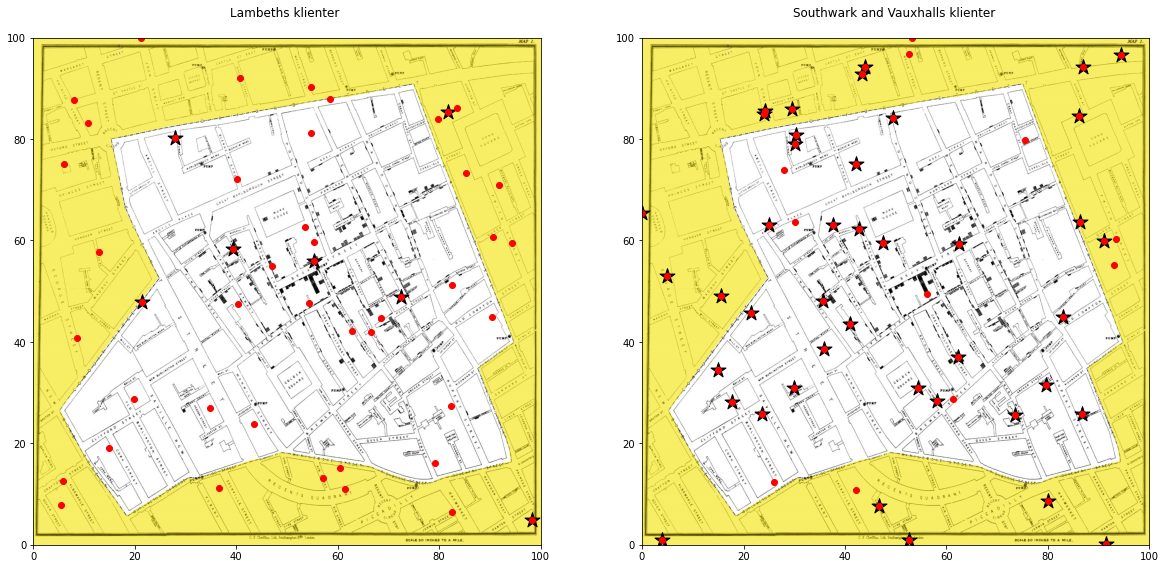

In [7]:
# Vi sätter in informationen ovan på en karta för att visualisera den.
# I den här simulationen är kartbilden bara en prydnad, och koordinaterna är ju också bara påhittade.
# I nästa exempel ska vi använda en riktig karta och verkliga koordinater.

# Vi skapar en figur och söker en bakgrundsbild.
plt.figure(figsize = (20, 20))
img = plt.imread("https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Kuvat/snowmap_1854.png")

# .subplot skapar flera koordinatsystem i samma bild
# .imshow sätter in bakgrundsbilden
# .scatter ritar ut punkter enligt de givna koordinaterna - svarta stjärnmarkörer betecknar dödsfall.

plt.subplot(121)
plt.imshow(img, extent=[0, 100, 0, 100])
plt.scatter(mL["Location X"], mL["Location Y"], color="black", marker = '*', s = 250)
plt.scatter(L["Location X"], L["Location Y"], color="red")
plt.title('Lambeths klienter \n')


plt.subplot(122)
plt.imshow(img, extent=[0, 100, 0, 100])
plt.scatter(mSV["Location X"], mSV["Location Y"], color="black", marker = '*', s = 250)
plt.scatter(SV["Location X"], SV["Location Y"], color="red")
plt.title('Southwark and Vauxhalls klienter \n')

plt.show()

I den smittovåg som Snow undersökte var fördelningen tydlig. Av månadens 44 dödsfall fick 38 sitt vatten från Southwark & Vauxhall, och 6 från Lambeth. Det stod klart att han var på rätt spår, och att en av leverantörerna pumpade förorenat vatten.

Tyvärr fick vår doktor annat att tänka på, när en explosiv smittovåg bröt ut nära Broad Street (numera Broadwick Street) i septermber 1854. Det var en tragedi. Människor dog snabbare än man hann bära bort likkistorna.

## Pumpar, smittokällor och hälsogeografi

I det här avsnittet använder vi oss av autentiska data från händelserna i augusti-september 1854.

John Snow härde om smittovågen 4.9.1854 och tillbringade de följande tre dagarna med att gå runt och samla statistik, rita kartor och säkerställa att försiktighetsåtgärder vidtogs. Det fanns ingen tid att förlora när folk smittades och dog i mängder varje dag - 127 dödsfall på tre dagar.

In [8]:
# Börja med att köra dessa paket, ifall du inte redan har kört dem i den första delen.

import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

In [9]:
# Vi läser in några datapaket sammanställda av Robin Wilson
# http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/

tider = pd.read_csv("https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/johnsnow_dataset_dates_all.csv")
dodstal = pd.read_csv("https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/johnsnow_dataset_deaths.csv")
pumpar = pd.read_csv("https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-finnish/master/Data/johnsnow_dataset_pumps_names.csv")

In [10]:
# Vi kan ta en titt på var och en av tabellerna. Ta bort # från ett kommando åt gången och kör cellen.

#tider.head()
#dodstal.head()
#pumpar.head()

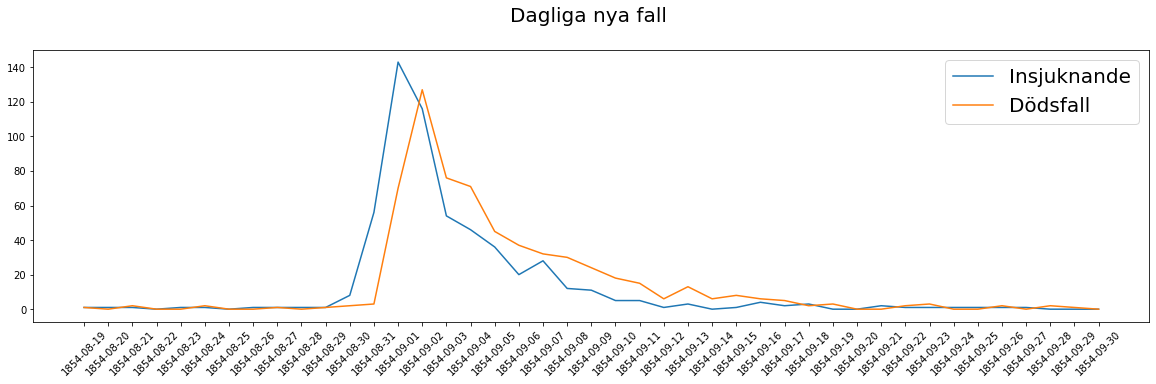

In [11]:
# Här ser vi tidsramen för epidemin.

plt.figure(figsize=(20,5))
plt.plot(tider["date"], tider["attacks"], label = 'Insjuknande')
plt.plot(tider['date'], tider['deaths'], label = 'Dödsfall')
plt.xticks(rotation='45')
plt.legend(fontsize = 20)
plt.title('Dagliga nya fall \n', fontsize = 20)

plt.show()

I diagrammet ovan ser vi hur sjukdomen spreds under månadens gång. Vi ser att dödsrisken för någon som insjuknat var väldigt hög, och förloppet kort. Vi ser den explosionsartade spridningen vid månadsskitet, varefter fallen avtog. Snow konstaterade i efterhand att sjukdomen troligen hade avtagit av sig själv, men det var en viktig händelse 8.9 som gjorde att man senare kunde hindra koleran från att spridas.

Snow ville samla information i området, men att ensam gå och knacka dörr och ställa frågor skulle ha tagit för lång tid. Han gick därför till medborgarregistret, Office of Register General, och bad att få information om tid och plats för alla dödsfall. Nedan finns en karta över området, där han märkte varje dödsfall som ett svart streck, likt likkistorna som låg sida vid sida på gårdarna.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/Snow-cholera-map-1.jpg'>

Genom att se på kartan ovan, vad kan man säga om dödsfallens fördelning?

Varför var det så få dödsfall i fattighuset (work house), trots att där bodde flera hundra?

Varför var det inga dödsfall alls i ölbryggeriet bredvid spridningens epicenter?

Med en matematiskt lagd medhjälpare använde Snow några dittills okända metoder för att tolka informationen. Han gjorde en täthetskarta, och använde något som numera är känt som ett [voronoidiagram](https://en.wikipedia.org/wiki/Voronoi_diagram), i vilket kartan delas upp så att varje område består av de punkter som ligger närmast en bestämd centralpunkt. Centralpunkterna var i detta fall vattenpumparna. På den tiden fanns inte rinnande vatten i alla hus, utan invånarna gick till allmänna pumpar för att bära hem vatten. Snow kunde anta att folk i allmänhet gick till den närmta pumpen för att hämta vatten, och därför kom voronodiagrammet till pass.


Snows tidigare misstanke om dricksvattnets roll i spridningen ledde honom alltså till den verkliga orsaken bakom denna smittovåg: Pumpen på Broad Street, synlig på kartan, hade förgiftat dem som tog sitt vatten därifrån. Fattighuset som låg i kvarteret norr om pumpen hade sin egen pump, och därför hade de inneboende klarat sig. De som bodde och arbetade i bryggeriet nära pumpen drack enbart öl. Pusselbitarna föll på plats.

In [12]:
# Folium-paketet låter oss rita in positionerna på en modern karta. 

import folium
from folium.map import Marker

In [13]:
# Vi gör koordinaterna till en lista så att den ska vara lätt att 

dat = [0]*len(dodstal)
for i in range(0, len(dodstal)):
    dat[i] = [dodstal['X coordinate'][i], dodstal['Y coordinate'][i]]

# Sedan gör vi samma sak med pumparnas koordinater
    
brunnar = [0]*len(pumpar)
for i in range(0, len(pumpar)):
    brunnar[i] = [pumpar['X coordinate'][i], pumpar['Y coordinate'][i]]

# Nu vill vi, för varje dödsposition, ta reda på vilken pump som är närmast. Kan du se hur koden nedan beräknar detta?

closest = []
for i in range(len(dodstal)):
    near = 1000
    ind = 0
    for b in range(len(brunnar)):
        dist = np.sqrt((dodstal['X coordinate'][i]-pumpar['X coordinate'][b])**2 
                   + (dodstal['Y coordinate'][i]-pumpar['Y coordinate'][b])**2)
        if dist < near:
            near = dist
            ind = b
    closest.append(pumpar['Pump Name'][ind])
    

In [16]:
pumpar.head() # Lägg märke till att x- och y-koordinaterna här är latitud och longitud. Det behövs för nästa steg.

,Pump Name,X coordinate,Y coordinate
0,Broad St.,51.513341,-0.136668
1,Crown Chapel,51.513876,-0.139586
2,Gt Marlborough,51.514906,-0.139671
3,Dean St.,51.512354,-0.131630
4,So Soho,51.512139,-0.133594


In [15]:
# Vi skapar en karta. Folium använder riktiga, nutida kartor, och 'Stamen Toner' är kartans typ (svartvit vägkarta)
# Koordinaterna och zoom-start-värdet anger hur kartan visas när den dyker upp.

karta = folium.Map([51.5135, -0.137], tiles='stamentoner', zoom_start=17)

# Vi sätter in dödspositioner, antal och närmsta pumpens namn.
# Vi gör markörerna närmast Broad Street-pumpen en annan färg.

for i in range(0,len(dodstal)):
    if closest[i] == "Broad St.":
        Marker(dat[i], popup = str('Avlidna : ' + str(dodstal["Number of deaths"][i]) 
                                + '\n' + 'Närmsta pump: ' + str(closest[i])), 
           icon = folium.Icon(color="red")).add_to(karta)
    
    else:
            Marker(dat[i], popup = str('Avlidna : ' + str(dodstal["Number of deaths"][i]) 
                                + '\n' + 'Närmsta pump: ' + str(closest[i])), 
           icon = folium.Icon(color="orange")).add_to(karta)

# Vi märker också ut pumparna i en annan färg.
    
for i in range(0, len(brunnar)):
    Marker(brunnar[i], popup = pumpar["Pump Name"][i], 
           icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(karta)

# Vi visar kartan. Genom att klicka på markörerna kan du se mer info om det hushållet.
karta

Lägg märke till att Foliums karta kan zoomas ut och in, och att alla markörer kan ha egen information som visas när man klickar på dem. 

Fastän resultatet verkar ganska klart när vi ser kartan - dödsfallen verkar centrerade kring pumpen på Broad Street - ska vi ännu undersöka fördelningen lite.

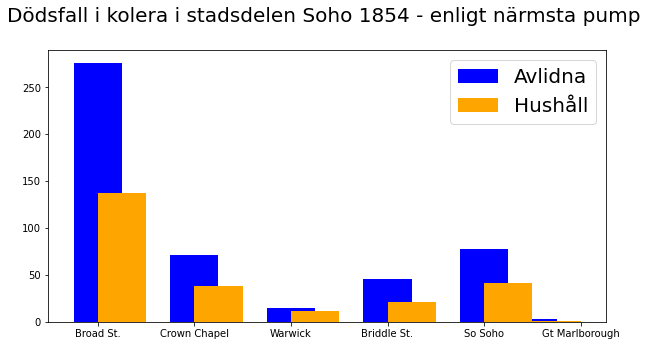

In [20]:
# Vi undersöker hur stor del av dödsfallen som skedde nära varje pump, och använder ett stapeldiagram för tydlighet.

plt.figure(figsize = (10,5))
plt.hist(closest, weights = dodstal['Number of deaths'], align = 'left', label = 'Avlidna', color = 'blue')
plt.hist(closest, align = 'mid', label = 'Hushåll', color = 'orange')
plt.title('Dödsfall i kolera i stadsdelen Soho 1854 - enligt närmsta pump \n', fontsize = 20)
plt.legend(fontsize = 20)
plt.show()

**Tehtävä 3, haastava:**

Jos ohjelmointi tuntuu sujuvan, saatko piirrettyä karttamerkkejä päivä kerrallaan niin, että voit seurata tapauksien etenemistä?

## Epilog - kursen mot ett mer sanitärt samhälle

John Snow, som hade kämpat dygnet runt i tre dagar lyckades till sist övertyga den lokala kommittén med dessa resultat. Den 8.9 tog man bort handtaget från pumpen på Broad Street så att det inte kunde användas. Detta var ännu inte ett fullständigt bevis för att bakterier orsakat spridningen istället för den allmänt accepterade miasman, men med hjälp av Pastor Henry Whitehead  kunde man mer säkert förstå det sambandet. Whitehead, som hade goda relationer med människorna i området, hjälpte Snow med undersökningen, och fick reda på varifrån det startade. den 31.8, dagen innan smittovågens utbrott, hade en kolerasmittad babys blöjor kastats i en avfallsbrunn på Broad Street. Brunnen låg nära pumpens brunn, och bakterier hade läckt in dit. Därefter följde katastrofen.

Det var inte förrän långt senare som mikrobteorin helt togs in i sjukvården och vardagen, men det stod klart att hygiennivån i samhället behövde förbättras, och det fort. Runt hela världen började man bygga kloaksystem, fastän det innebar att man behövde rota upp hela städer. (Bokstavligen i [Chicago](https://en.wikipedia.org/wiki/Raising_of_Chicago) - man lyfte bort hela hus för att gräva in rör under dem) Man fick bort avfallet från gatorna, och räddade på så sätt miljontals människoliv.

Kolera och liknande sjukdomar är ovanliga i västvärlden, men fortfarande kämpar man mot dem i fattigare länder. Ett färskt exempel är Haiti 2010. Året innan hade jordbävningar dödat 200 000 människor, och nu rapporterades 665 000 fall av kolera, 8183 döda. Internationellt stöd och grundförbättrad infrastruktur är ovärderligt för dessa områden, så att så många som möjligt kan få leva i humana förhållanden.

## Relaterad läsning:

Huldén, Lena (2006): Kuusijalkainen vihollinen

https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak

https://www.cdc.gov/cholera/haiti/index.html

http://blog.rtwilson.com/john-snows-cholera-data-in-more-formats/
